## Before we start getting into Amazon Braket
 
#### We have to understand the gates supported by amazon local simulator as it varies by different providers
#### But standard qauntum quantum gates remains same across different providers
       

In [1]:
import string
from braket.circuits import Gate

# print all available gates in Amazon Braket
gate_set = [attr for attr in dir(Gate) if attr[0] in string.ascii_uppercase]
print(gate_set)

['CCNot', 'CNot', 'CPhaseShift', 'CPhaseShift00', 'CPhaseShift01', 'CPhaseShift10', 'CSwap', 'CY', 'CZ', 'H', 'I', 'ISwap', 'PSwap', 'PhaseShift', 'Rx', 'Ry', 'Rz', 'S', 'Si', 'Swap', 'T', 'Ti', 'Unitary', 'V', 'Vi', 'X', 'XX', 'XY', 'Y', 'YY', 'Z', 'ZZ']


#### Demo of Superposition - Hadamard gate

A hadamard gate is used to superpositioning of the qubit - converting a classical state to quantum state 
0 to |0> |1> state with amplitude for each state

With this example - one can see the entanglement and how quantum gates can be used as classic gates 
demonstration of X gate.

T  : |0|Result Types|
                     
q0 : -H-Probability--
        |            
q1 : -X-Probability--

T  : |0|Result Types|
Results:
[0, 1]
Counter({'01': 529, '11': 471})
{'01': 0.529, '11': 0.471}


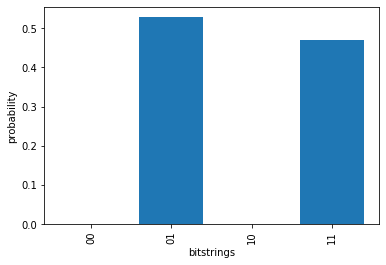

In [52]:
from braket.circuits import Circuit
from braket.devices import LocalSimulator
import matplotlib.pyplot as plt

#Building Circuit
circ=Circuit()
circ.h(0)
circ.x(1)

#circ.x(0).x(0)

circ.probability()
print(circ)

#Intializing Device to run the circuit and extract results
device = LocalSimulator()
task=device.run(circ,shots=1000) #pass circuit and number of iterations
results=task.result()

# get measurement results
measurements = results.measurements
measured_qubits = results.measured_qubits
measurement_counts = results.measurement_counts
measurement_probabilities = results.measurement_probabilities

print('Results:')
print(measured_qubits)
print(measurement_counts)
print(measurement_probabilities)
  
probs_values = results.values[0]
# bitstrings
format_bitstring = '{0:0' + str(2) + 'b}'
bitstring_keys = [format_bitstring.format(ii) for ii in range(2**2)]
    
# plot probabalities
plt.bar(bitstring_keys, probs_values);
plt.xlabel('bitstrings');
plt.ylabel('probability');
plt.xticks(rotation=90);

### Building quantum circuits incremental in three ways in Braket
* Using . and append gates and operations
* Using keyword instruction
* Using register keyword - to register a method which returns circuit under Circuit class - Increases modularity



In [50]:
#Building incremental circuit using . 
from braket.circuits import Circuit

circ=Circuit()

circ.x(0).x(0).h(0)

circ.amplitude(state=["0","1"])
print(circ)

print(circ.result_types[0])

task=device.run(circ,shots=0)
results=task.result()

print(results.values[0])

#Amplitude and State vector can be observed only when shots=0

T  : |0|1|2|
            
q0 : -X-X-H-

T  : |0|1|2|
Amplitude(state=['0', '1'])
{'0': (0.7071067811865475+0j), '1': (0.7071067811865475+0j)}


In [58]:
#Building incremental cicuit using instruction keyword

from braket.circuits import Gate,Instruction

circ=Circuit()

instr1=Instruction(Gate.X(),0)
instr2=Instruction(Gate.H(),0)

circ.add_instruction(instr1)
circ.add_instruction(instr2)

print(circ)


T  : |0|1|
          
q0 : -X-H-

T  : |0|1|


In [70]:
#Building using subroutine
from braket.circuits import circuit

@circuit.subroutine(register=True)
def superimposed_x(target):
    
    circ=Circuit()
    
    circ.x(target)
    circ.h(target)
    
    return circ

#Building Circuit using subroutine
circ=Circuit()
print('Before:\n',circ)
    
circ.superimposed_x(1)
circ.superimposed_x(0)
    
print('After:\n',circ)

Before:
 
After:
 T  : |0|1|
          
q0 : -X-H-
          
q1 : -X-H-

T  : |0|1|


###### Demonstrations of some of the gates 
###### Gates are two types-  single qubit (applied only on one qubit) and multi qubits(applied on more than one qubit)

* CNOT - Controlled NOT gate 
* CCNOT - Toffoli gate (Universal Reversible Gates)
* Swap gates - Swapping values between two qubits 
* Phase shift gates - Rx,Ry,Rz - rotation by theta radians


###### Self defined Unitary gates can also be used as shown below
import numpy as np <br>
my_unitary = np.array([[0, 1],[1, 0]])  <br>
circ.unitary(matrix=my_unitary, targets=[0]) <br>


T  : |0|1|Result Types|
                       
q0 : ---X-Probability--
        | |            
q1 : -X-C-Probability--

T  : |0|1|Result Types|
{'11': 1.0}


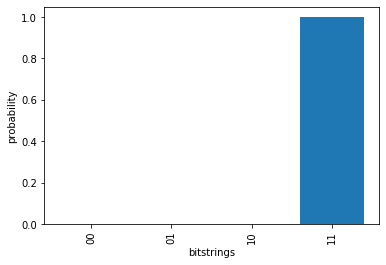

In [88]:
#Demonstration of CNOT - on calssic bits and on qubits
circ=Circuit()

circ.x(1)
#circ.h(0)
circ.cnot(1,0)
circ.probability()

print(circ)

task=device.run(circ,shots=1000)
results=task.result()

probs_values = results.values[0]
print(results.measurement_probabilities)


# bitstrings
format_bitstring = '{0:0' + str(2) + 'b}'
bitstring_keys = [format_bitstring.format(ii) for ii in range(2**2)]
    
# plot probabalities
plt.bar(bitstring_keys, probs_values);
plt.xlabel('bitstrings');
plt.ylabel('probability');
plt.xticks(rotation=90);

T  : |0|1|
          
q0 : -H-C-
        | 
q1 : -H-C-
        | 
q2 : ---X-

T  : |0|1|
{'111': 0.245, '100': 0.255, '000': 0.25, '010': 0.25}


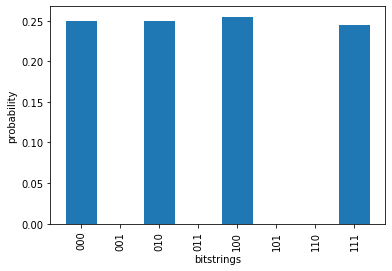

In [95]:
#Demonstration of CNOT - on calssic bits and on qubits - multigate 

circ=Circuit()

circ.h(0)
#circ.x(0)
circ.h(1)
#circ.x(1)
circ.ccnot(0,1,2)

circ.probability()
print(circ)

task=device.run(circ,shots=1000)
results=task.result()

probs_values = results.values[0]
print(results.measurement_probabilities)

# bitstrings
format_bitstring = '{0:0' + str(3) + 'b}'
bitstring_keys = [format_bitstring.format(ii) for ii in range(2**3)]
    
# plot probabalities
plt.bar(bitstring_keys, probs_values);
plt.xlabel('bitstrings');
plt.ylabel('probability');
plt.xticks(rotation=90);

T  : |0| 1  |
             
q0 : -X-SWAP-
        |    
q1 : ---SWAP-

T  : |0| 1  |
{'01': 1.0}


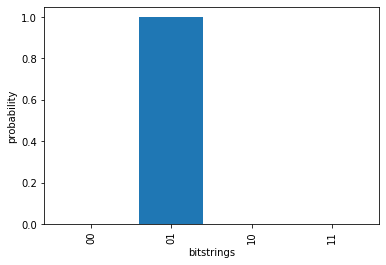

In [105]:
#Swap gate to swap values of qubits

circ=Circuit()

circ.x(0)
#circ.h(0)
circ.swap(0,1)

circ.probability()
print(circ)

task=device.run(circ,shots=1000)
results=task.result()

probs_values = results.values[0]
print(results.measurement_probabilities)

# bitstrings
format_bitstring = '{0:0' + str(2) + 'b}'
bitstring_keys = [format_bitstring.format(ii) for ii in range(2**2)]
    
# plot probabalities
plt.bar(bitstring_keys, probs_values);
plt.xlabel('bitstrings');
plt.ylabel('probability');
plt.xticks(rotation=90);


Theta: 1.57 

T  : |   0    |Result Types|
                            
q0 : -Rx(1.57)-Probability--
               |            
q1 : -Ry(1.57)-Probability--

T  : |   0    |Result Types|
{'00': 0.257, '10': 0.239, '01': 0.252, '11': 0.252}


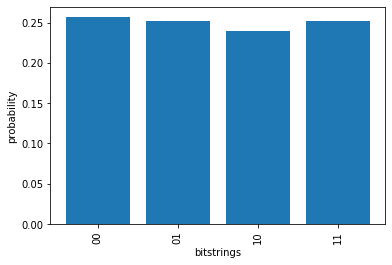

In [116]:
#Phase shift gates are single qubit operations along x,y,x axis 
## controlled shifts using cx,cy,cz

import numpy as np 

circ=Circuit()

theta = np.radians(90)   #shifting the qubit by pi/2
   
print('Theta:',round(theta,2),'\n')

circ.rx(0,theta)
circ.ry(1,theta)
circ.probability()
print(circ)

task=device.run(circ,shots=1000)
results=task.result()

probs_values=results.values[0]
print(results.measurement_probabilities)

# bitstrings
format_bitstring = '{0:0' + str(2) + 'b}'
bitstring_keys = [format_bitstring.format(ii) for ii in range(2**2)]
    
# plot probabalities
plt.bar(bitstring_keys, probs_values);
plt.xlabel('bitstrings');
plt.ylabel('probability');
plt.xticks(rotation=90);



###### Braket Result Types

* Amplitude
* Expectation
* Probability
* State vector
* Sample
* Variance

###### Here we demonstrate just sample type and calculate expectation out of sample results.
    

In [120]:
#Observables - real values that helps to measure the state of the system 
from braket.circuits import Observable
circ=Circuit()

circ.h(0)
circ.h(1)
circ.ccnot(0,1,2)

circ.sample(observable=Observable.X(), target=0)
circ.sample(observable=Observable.Y(), target=1)
circ.sample(observable=Observable.Z(), target=2)

print(circ)

task=device.run(circ,shots=1000)
result=task.result()

print('\nResults:')
for label, res in zip(('X', 'Y', 'Z'), list(result.values)):
    expectation = 1 - 2 * np.mean(res[result.measurements[:,0]==1])
    print('{} = {}'.format(label, expectation))

T  : |0|1|Result Types|
                     
q0 : -H-C-Sample(X)----
        |            
q1 : -H-C-Sample(Y)----
        |            
q2 : ---X-Sample(Z)----

T  : |0|1|Result Types|

Results:
X = 3.0
Y = 1.0307692307692307
Z = 0.8461538461538461
